# KDE

https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

http://shogun-toolbox.org/notebook/latest/KernelDensity.html

In [51]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity

warnings.simplefilter(action='ignore')

In [78]:
# pdf function for plotting
n_samples = 100
x_min = 0
x_max = 15

# parameters of the distribution
mu1 = 4
sigma1 = 1
mu2 = 8
sigma2 = 2

# Parameters of the KDE
bandwidth = 0.5

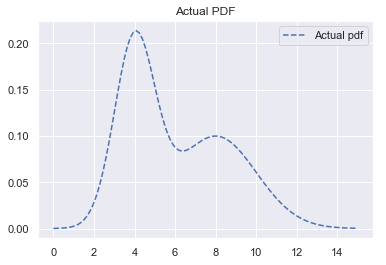

In [86]:
x = np.linspace(x_min, x_max, n_samples)
y = 0.5*(stats.norm(mu1, sigma1).pdf(x)+stats.norm(mu2, sigma2).pdf(x))

# plot actual pdf
plt.plot(x, y, 'b--', label="Actual pdf")
plt.legend(numpoints=1)
plt.title('Actual PDF')
plt.show();

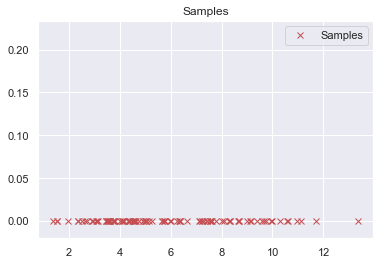

In [87]:
def generate_samples(n_samples, mu1, sigma1, mu2, sigma2):
    samples1 = np.random.normal(mu1, sigma1, (1, int(n_samples/2)))
    samples2 = np.random.normal(mu2, sigma2, (1, int(n_samples/2)))
    samples = np.concatenate((samples1, samples2), 1)
    return samples

samples = generate_samples(n_samples, mu1, sigma1, mu2, sigma2)
samples = samples.T

# plot samples
plt.plot(samples, np.zeros(n_samples), 'rx', label="Samples")
plt.legend(numpoints=1)
plt.title('Samples')
plt.ylim(-0.02, max(y)+0.02)
plt.show()

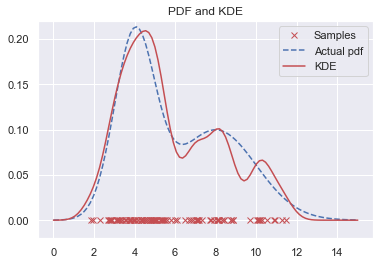

In [81]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(samples)

# score_samples returns the log of the probability density
x_d = np.linspace(0.001, 15, n_samples).reshape(-1, 1)
logprob = kde.score_samples(x_d)

# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(samples, np.zeros(n_samples), 'rx', label='Samples')
plt.plot(x, y, 'b--', label="Actual pdf")
plt.plot(x_d, np.exp(logprob), 'r-', label='KDE')
plt.legend()
plt.title('PDF and KDE')
plt.ylim(-0.02, 0.22)
plt.show();

In [82]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
grid = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())
grid.fit(x[:, None]);
grid.best_params_

{'bandwidth': 1.0235310218990263}

In [83]:
bandwidth = grid.best_params_['bandwidth']

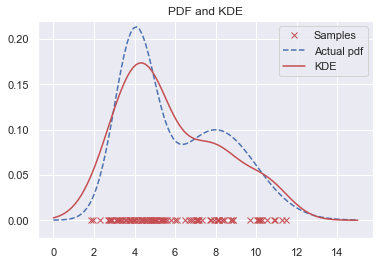

In [84]:
# instantiate and fit the KDE model
kde = KernelDensity(bandwidth=bandwidth, kernel='gaussian')
kde.fit(samples)

# score_samples returns the log of the probability density
x_d = np.linspace(0.001, 15, n_samples).reshape(-1, 1)
logprob = kde.score_samples(x_d)

# plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(samples, np.zeros(n_samples), 'rx', label='Samples')
plt.plot(x, y, 'b--', label="Actual pdf")
plt.plot(x_d, np.exp(logprob), 'r-', label='KDE')
plt.legend()
plt.title('PDF and KDE')
plt.ylim(-0.02, 0.22)
plt.show();